In [645]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations


In [646]:
# Load nodes from a Pandas DataFrame
# Example DataFrame with columns X, Y, Z, Atom_Name, Residue_Name, Residue_ID, Atom_Type, and Timeframe
# Load nodes for all timesteps
filepath = '/home/mhanowar/Downloads/dataframe100frames.csv'  # Replace with the actual file path
df = pd.read_csv(filepath)

In [647]:
# subset of data
# Define the conditions
conditions = (
    (df['Residue_Name'] == 'CSP') & df['Atom_Type'].isin(['n', 'h']),
    (df['Residue_Name'] == 'SFL') & df['Atom_Type'].isin(['o', 'os']),
    (df['Residue_Name'] == 'RFL') & df['Atom_Type'].isin(['o', 'os'])
)

# Combine conditions using logical OR
final_condition = conditions[0] | conditions[1] | conditions[2]

# Apply the combined condition to filter the DataFrame
df = df[final_condition]
# df = df[df['Timeframe'] == 1]
df = df.reset_index(drop=True)
df


,X,Y,Z,Atom_Name,Residue_Name,Residue_ID,Atom_Type,Timeframe
0,11.649165,-2.592921,29.447174,N11,CSP,1,n,0
1,6.221285,1.314937,23.042118,N23,CSP,1,n,0
2,5.545125,-4.408506,21.934305,N35,CSP,1,n,0
3,9.018182,-1.111371,31.179316,N55,CSP,1,n,0
4,14.323432,4.476876,25.651325,N67,CSP,1,n,0
...,...,...,...,...,...,...,...,...
23595,33.796783,54.585758,68.484253,O2,SFL,12,o,99
23596,47.951912,30.325182,57.910664,O1,SFL,13,os,99
23597,50.853600,27.902849,56.672512,O2,SFL,13,o,99
23598,52.845436,40.218285,67.283249,O1,SFL,14,os,99


In [648]:


# Function to calculate Euclidean distance between two nodes
def calculate_distance(node1, node2):
    return np.linalg.norm(node1 - node2)

# Function to create edges within a distance threshold
def create_edges_within_threshold(nodes, node_names, threshold):
    edges = []
    num_nodes = len(nodes)
    for i, j in combinations(range(num_nodes), 2):
        node1, node2 = nodes[i], nodes[j]
        distance = calculate_distance(node1, node2)
        if distance <= threshold:
            edges.append((node_names[i], node_names[j], distance))
    return edges


# Specify the distance threshold
distance_threshold = 10.0 

# Create edges for each timeframe
all_edges = []
for timeframe, group in df.groupby('Timeframe'):
    nodes = group[['X', 'Y', 'Z']].values
    node_names = group.apply(lambda row: f"{row['Atom_Name']}_{row['Residue_ID']}", axis=1).values
    edges = create_edges_within_threshold(nodes, node_names, distance_threshold)
    all_edges.extend([(edge[0], edge[1], edge[2], timeframe) for edge in edges])

# Create DataFrame for edges
columns = [ 'Node1', 'Node2', 'Edge_Dist', 'Timeframe']
df = pd.DataFrame(all_edges, columns=columns)
df


,Node1,Node2,Edge_Dist,Timeframe
0,N11_1,N23_1,9.260560,0
1,N11_1,N35_1,9.848800,0
2,N11_1,N55_1,3.481002,0
3,N11_1,N67_1,8.458262,0
4,N11_1,N79_1,5.301772,0
...,...,...,...,...
93576,O1_10,O2_10,4.173890,99
93577,O1_11,O2_11,4.146309,99
93578,O1_12,O2_12,4.069130,99
93579,O1_13,O2_13,3.977500,99


In [649]:
# Define conditions for filtering
condition1 = df['Node1'].str.endswith(('_1', '_2', '_3',
            '_4')) & df['Node2'].str.endswith(('_5', '_6',
             '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14'))
condition2 = df['Node2'].str.endswith(('_1', '_2', '_3',
             '_4')) & df['Node1'].str.endswith(('_5', '_6', 
            '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14'))

# Apply the conditions to filter the DataFrame
df = df[condition1 | condition2].reset_index(drop=True)

df

,Node1,Node2,Edge_Dist,Timeframe
0,N451_1,O1_10,9.243958,0
1,N495_1,O1_10,6.739294,0
2,N563_1,O2_6,9.787450,0
3,N563_1,O1_10,6.535653,0
4,N331_2,O1_11,9.445005,0
...,...,...,...,...
1868,N451_2,O2_6,7.566657,99
1869,N451_2,O1_10,8.683629,99
1870,N507_2,O2_6,9.882716,99
1871,N519_2,O1_6,8.245787,99


In [650]:
df = df.sort_values(by=['Node1', 'Timeframe']).reset_index(drop=True)
df

,Node1,Node2,Edge_Dist,Timeframe
0,N199_2,O2_11,9.867029,30
1,N199_2,O2_11,9.910129,32
2,N199_2,O2_11,9.833108,45
3,N199_2,O2_11,9.881741,53
4,N199_2,O2_11,9.684322,54
...,...,...,...,...
1868,N563_2,O2_6,9.811772,28
1869,N563_2,O2_6,9.847707,41
1870,N563_2,O2_6,9.869133,42
1871,N563_2,O2_6,9.941175,44


In [651]:
# # Your DataFrame
# data = {
#     'Node1': ['N11_1', 'N11_7', 'N11_2', 'N11_1', 'O1_2'],
#     'Node2': ['N23_2', 'O2_2', 'O1_5', 'N67_6', 'N79_5']
# }

# df = pd.DataFrame(data)

# Define a function to determine edge type
def get_edge_type(row):
    if (row['Node1'].startswith('N') and row['Node2'].startswith('O1')) or (
        row['Node2'].startswith('N') and row['Node1'].startswith('O1')):
        return 1
    elif (row['Node1'].startswith('N') and row['Node2'].startswith('O2')) or (
        row['Node2'].startswith('N') and row['Node1'].startswith('O2')):
        return 2
    elif (row['Node1'].startswith('H') and row['Node2'].startswith('O1')) or (
        row['Node2'].startswith('H') and row['Node1'].startswith('O1')):
        return 3
    elif (row['Node1'].startswith('H') and row['Node2'].startswith('O2')) or (
        row['Node2'].startswith('H') and row['Node1'].startswith('O2')):
        return 4
    else:
        return 0

# Apply the function to create the 'Edge_Type' column
df['Edge_Type'] = df.apply(get_edge_type, axis=1)

df.insert(0, 'Edge_Idx', df.reset_index().index)

# Display the DataFrame
print(df)


      Edge_Idx   Node1  Node2  Edge_Dist  Timeframe  Edge_Type
0            0  N199_2  O2_11   9.867029         30          2
1            1  N199_2  O2_11   9.910129         32          2
2            2  N199_2  O2_11   9.833108         45          2
3            3  N199_2  O2_11   9.881741         53          2
4            4  N199_2  O2_11   9.684322         54          2
...        ...     ...    ...        ...        ...        ...
1868      1868  N563_2   O2_6   9.811772         28          2
1869      1869  N563_2   O2_6   9.847707         41          2
1870      1870  N563_2   O2_6   9.869133         42          2
1871      1871  N563_2   O2_6   9.941175         44          2
1872      1872  N563_2   O2_6   9.956993         59          2

[1873 rows x 6 columns]


In [654]:
df.head(50)

,Edge_Idx,Node1,Node2,Edge_Dist,Timeframe,Edge_Type
0,0,N199_2,O2_11,9.867029,30,2
1,1,N199_2,O2_11,9.910129,32,2
2,2,N199_2,O2_11,9.833108,45,2
3,3,N199_2,O2_11,9.881741,53,2
4,4,N199_2,O2_11,9.684322,54,2
5,5,N199_2,O2_11,9.378292,57,2
6,6,N199_2,O2_11,9.578946,59,2
7,7,N199_2,O2_11,9.941132,66,2
8,8,N199_2,O2_11,9.828899,78,2
9,9,N211_2,O2_11,9.865206,53,2


In [652]:
df.to_csv('continuous_edge.csv', index=False)

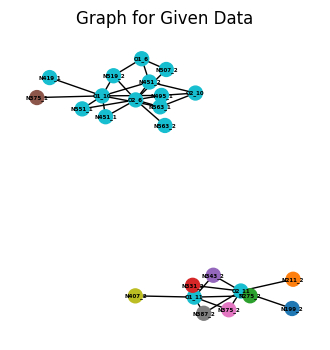

In [653]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# # Creating the DataFrame
# data = {
#     'Edge_Index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'Node1': ['H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1', 'N123_1'],
#     'Node2': ['N123_1', 'O120_1', 'O54_1', 'N123_1', 'O120_1', 'O54_1', 'N123_1', 'O120_1', 'O54_1', 'N123_1', 'O120_1'],
#     'Edge_Dist': [1.013001, 2.276632, 2.216071, 1.013000, 2.319315, 2.197912, 1.013000, 2.373854, 2.331444, 1.013000, 2.2419],
#     'Timeframe': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 0]
# }



# Get unique nodes from both Node1 and Node2 columns
all_nodes = pd.concat([df['Node1'], df['Node2']]).unique()

# Assign a color to each node
node_colors = {node: plt.cm.tab10(i) for i, node in enumerate(all_nodes)}

# Plot the graph using networkx and matplotlib
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2', ['Edge_Dist'])
pos = nx.spring_layout(G)

fig, ax = plt.subplots(figsize=(4, 4))

# Draw nodes with specified colors
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=100)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw labels
nx.draw_networkx_labels(G, pos, font_weight='bold', font_color='black', font_size=4)

plt.title('Graph for Given Data')
plt.axis('off')
plt.show()
